In [20]:
import tensorflow
tensorflow.__version__

'2.12.0'

In [21]:
# 필요한 모듈 임포트
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



# tf.data를 사용하여 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

print(type(train_ds))
print(type(val_ds))


# # MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

# # 모델 생성
# model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# # model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# # 모델 학습
# hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

# # 모델 평가
# print('모델 평가')
# model.evaluate(x_test, y_test)

# # 모델 정보 출력
# model.summary()

# # 모델 저장
# model.save('mnist_model.h5')

# # 학습 결과 그래프 그리기
# fig, loss_ax = plt.subplots()
# acc_ax = loss_ax.twinx()
# loss_ax.plot(hist.history['loss'], 'y', label='train loss')
# loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
# acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
# acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
# loss_ax.set_xlabel('epoch')
# loss_ax.set_ylabel('loss')
# acc_ax.set_ylabel('accuracy')
# loss_ax.legend(loc='upper left')
# acc_ax.legend(loc='lower left')
# plt.show()


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>


AttributeError: '_BatchDataset' object has no attribute 'shape'

Epoch 1/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.8821 - accuracy: 0.7429 - val_loss: 0.4028 - val_accuracy: 0.8847
Epoch 2/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.3744 - accuracy: 0.8924 - val_loss: 0.3308 - val_accuracy: 0.9049
Epoch 3/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.3201 - accuracy: 0.9080 - val_loss: 0.3006 - val_accuracy: 0.9138
Epoch 4/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2860 - accuracy: 0.9180 - val_loss: 0.2618 - val_accuracy: 0.9272
Epoch 5/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2608 - accuracy: 0.9254 - val_loss: 0.2481 - val_accuracy: 0.9304
Epoch 6/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2416 - accuracy: 0.9312 - val_loss: 0.2402 - val_accuracy: 0.9312
Epoch 7/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2261 - accuracy: 0.9348 - val_loss: 0.2249 - val_accuracy:

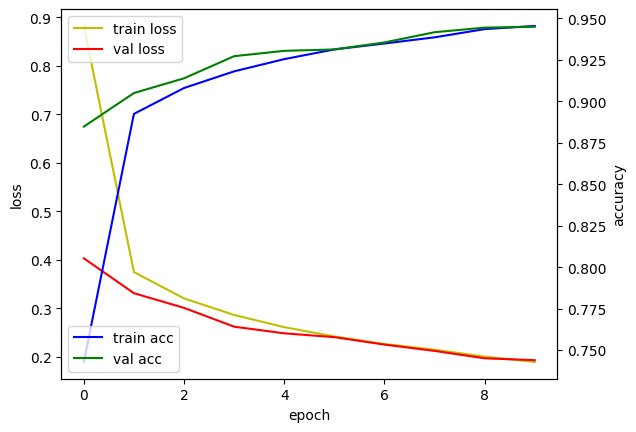

In [11]:
# 필요한 모듈 임포트
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화


# tf.data를 사용하여 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

# MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

# 모델 평가
print('모델 평가')
model.evaluate(x_test, y_test)

# 모델 정보 출력
model.summary()

# 모델 저장
model.save('mnist_model.h5')

# 학습 결과 그래프 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 20)                15700     
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
313/313 - 0s - loss: 0.1917 - accuracy: 0.9422 - 315ms/epoch - 1ms/step


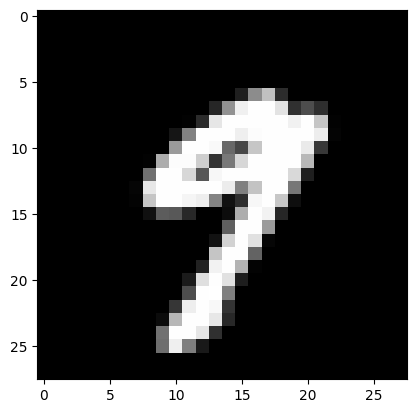

1/1 [==============================] - 0s 50ms/step
손글씨 이미지 예측값 :  [9]


In [26]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# MNIST 데이터셋 가져오기
_, (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0 # 데이터 정규화

# 모델 불러오기
model = load_model('mnist_model.h5')
model.summary()
model.evaluate(x_test, y_test, verbose=2)

# 테스트셋에서 20번째 이미지 출력
plt.imshow(x_test[20], cmap="gray")
plt.show()

# 테스트셋의 20번째 이미지 클래스 분류
picks = [20]
#predict = model.predict_classes(x_test[picks])
predict = model.predict(x_test[picks])
predicted = predict.argmax(axis=-1)
print("손글씨 이미지 예측값 : ", predicted)

Epoch 1/5
2100/2100 [==============================] - 3s 1ms/step - loss: 0.8307 - accuracy: 0.7503 - val_loss: 0.3876 - val_accuracy: 0.8907
Epoch 2/5
2100/2100 [==============================] - 3s 1ms/step - loss: 0.3566 - accuracy: 0.8987 - val_loss: 0.3149 - val_accuracy: 0.9103
Epoch 3/5
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2947 - accuracy: 0.9170 - val_loss: 0.2616 - val_accuracy: 0.9254
Epoch 4/5
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2608 - accuracy: 0.9257 - val_loss: 0.2395 - val_accuracy: 0.9345
Epoch 5/5
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2371 - accuracy: 0.9324 - val_loss: 0.2196 - val_accuracy: 0.9380
모델 평가
313/313 [==============================] - 0s 865us/step - loss: 0.2205 - accuracy: 0.9372
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (Non

AttributeError: 'Axes' object has no attribute 'ylim'

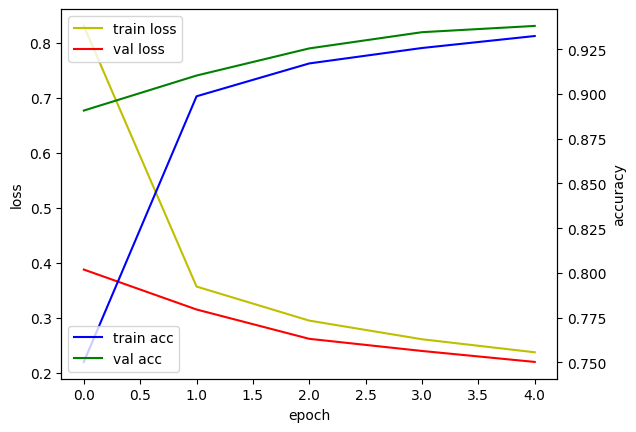

In [39]:
# 필요한 모듈 임포트
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense



def load_data():
    # MNIST 데이터셋 가져오기
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화

    # tf.data를 사용하여 데이터셋을 섞고 배치 만들기
    ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
    train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
    train_ds = ds.take(train_size).batch(20)
    val_ds = ds.skip(train_size).batch(20)

def model_compile_and_fit(in_epoch=10, opt="adam"):
    # MNIST 분류 모델 구성
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # 모델 생성
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    # 모델 학습
    hist = model.fit(train_ds, validation_data=val_ds, epochs=in_epoch)

    return model, hist


def model_evaluate(model):

    # 모델 평가
    print('모델 평가')
    model.evaluate(x_test, y_test)



def model_save(in_name, model):

    # 모델 저장
    model.save(in_name)


def plot_loss(hist):

    # 학습 결과 그래프 그리기
    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuracy')
    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    acc_ax.ylim(0.6, 1)
    loss_ax.ylim(0.2, 1)
    plt.show()



if __name__ == '__main__':

    # data load
    load_data()

    # 모델 설정 및 학습
    # epoch=5
    model_name = "sgd"
    model, hist = model_compile_and_fit(5, 'sgd')
    #model_epoch20, hist_epoch20 = model_compile_and_fit(20)

    # model eval
    model_evaluate(model)
    #model_evaluate(model_epoch20)

    # 모델 정보 출력
    model.summary()
    #model_epoch20.summary()

    # model save
    model_save(in_name="mnist_model_epoch5_"+model_name+".h5", model=model)
    #model_save(in_name="mnist_model_epoch20.h5", model=model_epoch20)

    # plot
    plot_loss(hist)
    #plot_loss(hist_epoch20)





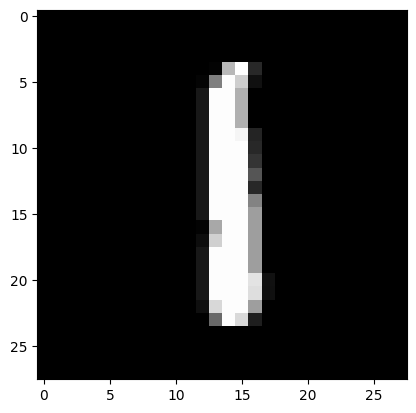

1/1 [==============================] - 0s 54ms/step
손글씨 이미지 예측값 :  [1]


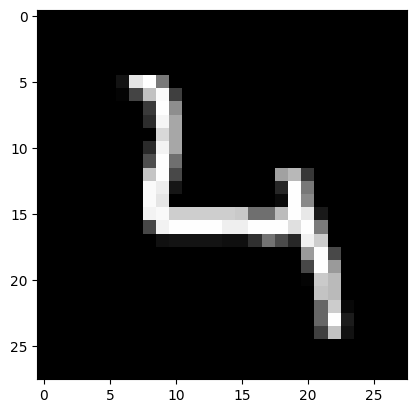

1/1 [==============================] - 0s 18ms/step
손글씨 이미지 예측값 :  [4]


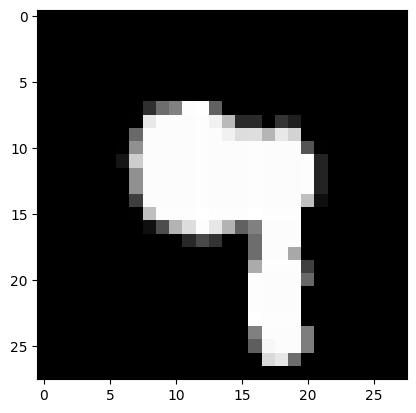

1/1 [==============================] - 0s 17ms/step
손글씨 이미지 예측값 :  [9]


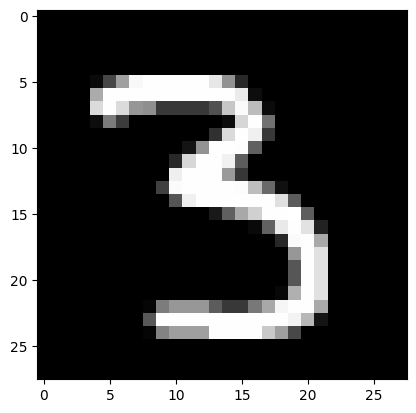

1/1 [==============================] - 0s 17ms/step
손글씨 이미지 예측값 :  [3]


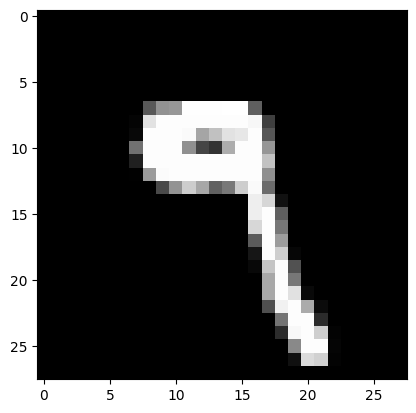

1/1 [==============================] - 0s 18ms/step
손글씨 이미지 예측값 :  [9]


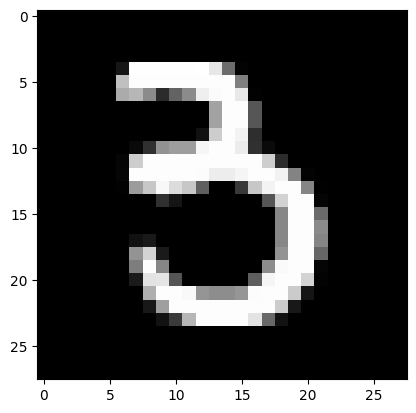

1/1 [==============================] - 0s 19ms/step
손글씨 이미지 예측값 :  [3]


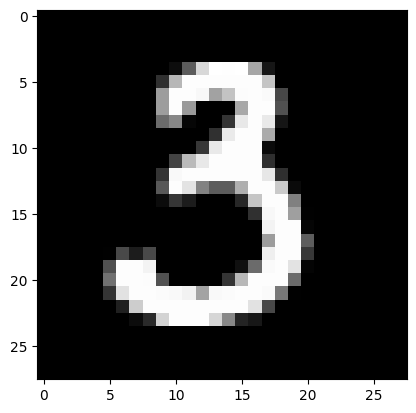

1/1 [==============================] - 0s 20ms/step
손글씨 이미지 예측값 :  [3]


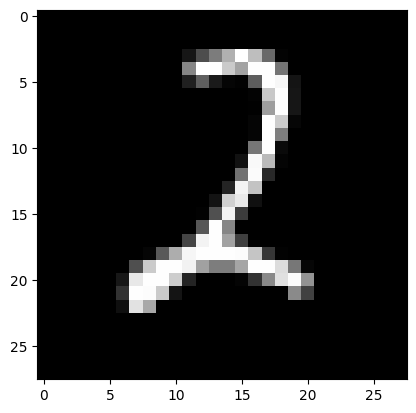

1/1 [==============================] - 0s 17ms/step
손글씨 이미지 예측값 :  [2]


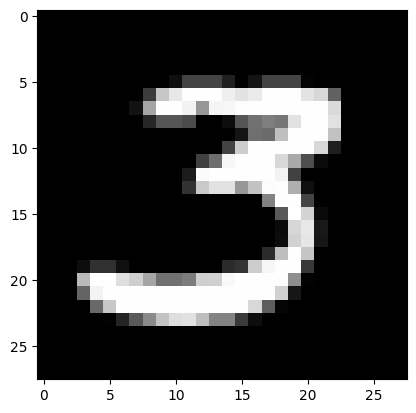

1/1 [==============================] - 0s 18ms/step
손글씨 이미지 예측값 :  [3]


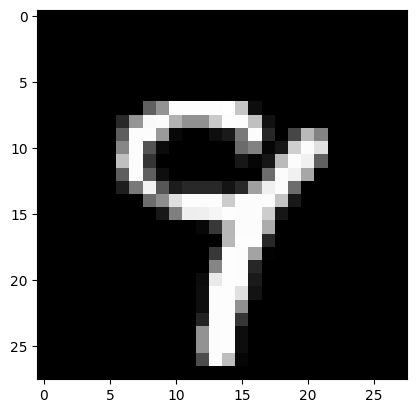

1/1 [==============================] - 0s 43ms/step
손글씨 이미지 예측값 :  [9]


In [40]:
import random

for i in range(10):
    ran_int = random.randint(1, 10000)
    # 테스트셋에서 20번째 이미지 출력    
    plt.imshow(x_test[ran_int], cmap="gray")
    plt.show()
    # 테스트셋의 20번째 이미지 클래스 분류
    picks = [ran_int]
    #predict = model.predict_classes(x_test[picks])
    predict = model.predict(x_test[picks])
    predicted = predict.argmax(axis=-1)
    print("손글씨 이미지 예측값 : ", predicted)